# Term Project : Algorithm - Regression
## Data Science, 2024 Spring
### 2024-06-02

In [9]:
!pip install openpyxl==3.1.0

In [158]:
# Term Project : Algorithm - Regression
# 2024-06-02

# Import Packages & Initial Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree

sns.set(style='whitegrid')

In [159]:
file_path = '../data/integrationV3.csv'
data = pd.read_csv(file_path, index_col='Date')
# Drop first column (Integer Index)
data.drop(data.columns[0], axis=1, inplace=True)

In [160]:
# # xlsx_file_path = 'integrationV2.xlsx'

# # # Read Data from xlsx file, Set first row(Row #0) as header
# # data = pd.read_excel(xlsx_file_path, header=0)
# # Drop first column (Integer Index)
# data.drop(data.columns[0], axis=1, inplace=True)

# # Set Date to Index
# date_col = [col for col in data.columns if 'Date' in col][0]
# data.set_index(date_col, inplace=True)

In [161]:
# Printout DataFrame
print(data.head(3))
print(data.info())

            Total Traffic Volume  Base Interest Rate  Exchange Rate  \
Date                                                                  
2011-01-01               5466446                2.75    1121.500000   
2011-01-02               5059821                2.75    1121.732258   
2011-01-03               5631394                2.75    1121.964516   

            Gross Domestic Product (GDP)  \
Date                                       
2011-01-01                      328096.0   
2011-01-02                      328096.0   
2011-01-03                      328096.0   

            Economic Growth Rate (Real GDP Growth Rate)  Export price  \
Date                                                                    
2011-01-01                                          5.4    44465366.0   
2011-01-02                                          5.4    44269519.6   
2011-01-03                                          5.4    44073673.2   

            Export growth rate  Import price  Import grow

In [162]:
# Encoding Categorical Data (If needs)
# # file_path = 'complete.csv'
# file_path = '../data/complete.csv'
# data = pd.read_csv(file_path, index_col='date')

# encoding_dict = {'negative': -1, 'normal': 0, 'weak positive': 0.5, 'positive': 1}
# data['Economic growth state'] = data['Economic growth state'].map(encoding_dict)
# data = data.dropna()
# # 데이터 확인
# print(data.head())

In [163]:
data = data.dropna()

In [164]:
# Set X, y
X = data.drop(columns=['Total Traffic Volume'])
y = data['Total Traffic Volume']

In [165]:
# # (If needs) NaN이 있는 row만 선택
# rows_with_nan = data[data.isnull().any(axis=1)]

# print(rows_with_nan)

In [166]:
# Split dataset -> Train Dataset : Test Dataset = 8:2 (데이터를 학습용과 테스트용으로 분할)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
########## Linear Regression

# Create LinearRegression model instance & Train model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [168]:
# Predict with Test Dataset
y_pred_linear = model_linear.predict(X_test)

In [169]:
# Evaluate Model (모델 성능 평가)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("[Linear Regression] Mean Squared Error:", mse_linear)
print("[Linear Regression] R^2 Score:", r2_linear)

[Linear Regression] Mean Squared Error: 589135111310.4037
[Linear Regression] R^2 Score: 0.7321568255589228


### Visualize - Linear Regression

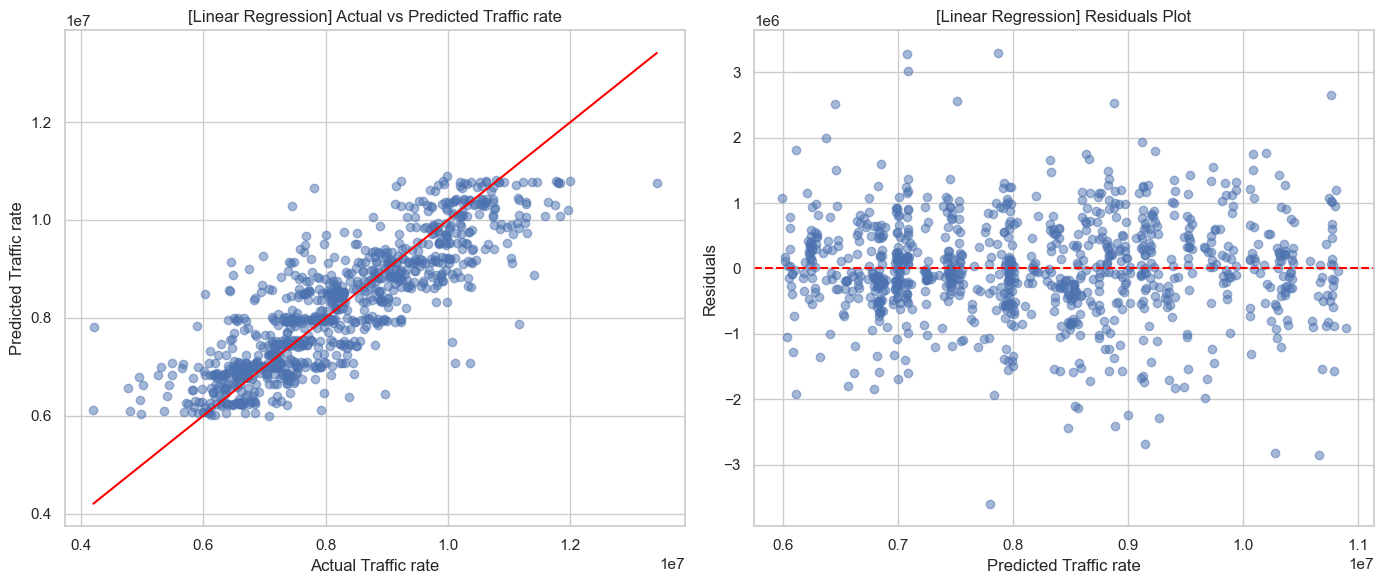

In [170]:
########## Visualize - Linear Regression

# 시각화
plt.figure(figsize=(14, 6))

# 산점도: 실제 값 vs 예측 값
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel("Actual Traffic rate")
plt.ylabel("Predicted Traffic rate")
plt.title("[Linear Regression] Actual vs Predicted Traffic rate")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# 잔차 플롯
plt.subplot(1, 2, 2)
residuals_linear = y_test - y_pred_linear
plt.scatter(y_pred_linear, residuals_linear, alpha=0.5)
plt.xlabel("Predicted Traffic rate")
plt.ylabel("Residuals")
plt.title("[Linear Regression] Residuals Plot")
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

### Random Forest Regression (Ensemble method)

In [171]:
############## Random Forest Regression (Ensemble method)

model_randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
model_randomForest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [172]:
# Predict with Test Dataset
y_pred_randomForest = model_randomForest.predict(X_test)

In [173]:
# Print out Feature Importance Score & Features name
importances = model_randomForest.feature_importances_
names = model_randomForest.feature_names_in_
estimator_list = model_randomForest.estimators_

print("Importances:", importances)
print("Names:", names)

Importances: [0.01095003 0.06528815 0.47469834 0.00235422 0.03872434 0.03367571
 0.03362872 0.03364714 0.07445183 0.03022437 0.02975238 0.17260476]
Names: ['Base Interest Rate' 'Exchange Rate' 'Gross Domestic Product (GDP)'
 'Economic Growth Rate (Real GDP Growth Rate)' 'Export price'
 'Export growth rate' 'Import price' 'Import growth rate'
 'Nationwide Consumer Price Index' 'Regular Unleaded Gasoline'
 'Diesel Fuel for Automobiles' 'number of car ownership']


### Visualize Fature Importance

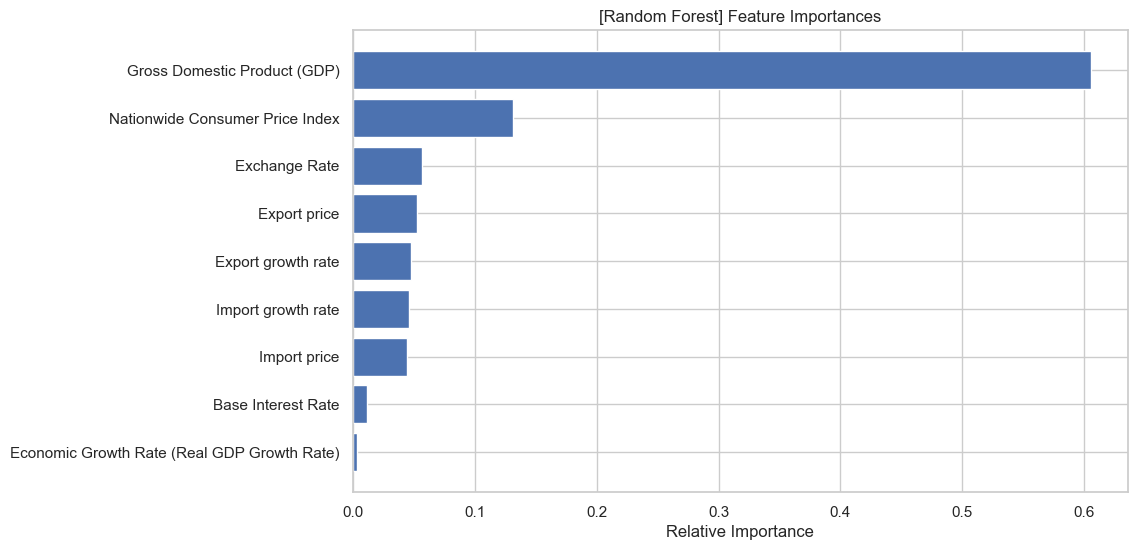

In [174]:
# Visualize Fature Importance with Bar Plot (피처(Feature) 중요도 시각화)
indices = np.argsort(importance)

# 특성 중요도 플로팅
plt.figure(figsize=(10, 6))
plt.title('[Random Forest] Feature Importances')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# sns.barplot(x=names , y=importances)
# plt.title('[Random Forest] Feature Importance')
# plt.show()

# plt.figure(figsize=(20,20))
# tree.plot_tree(model_randomForest.estimators_[0], feature_names=X.columns, filled=True)

In [175]:
# Evaluate Model
mse_randomForest = mean_squared_error(y_test, y_pred_randomForest)
r2_randomForest = r2_score(y_test, y_pred_randomForest)

print("[Random Forest] Mean Squared Error:", mse_randomForest)
print("[Random Forest] R^2 Score:", r2_randomForest)

[Random Forest] Mean Squared Error: 565021076122.2942
[Random Forest] R^2 Score: 0.743119980885043


### Visualize - Random Forest Regression (Ensemble method)

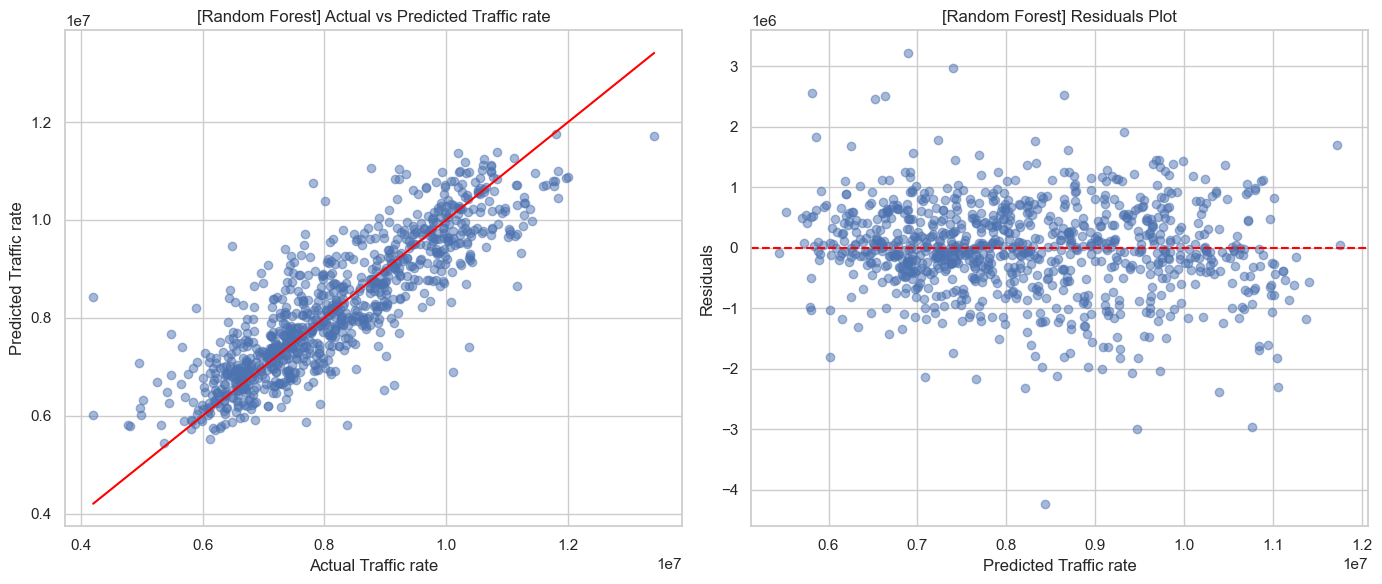

In [176]:
########## Visualize - Random Forest Regression (Ensemble method)

# 시각화
plt.figure(figsize=(14, 6))

# Scatter (Actual vs Predicted) 산점도: 실제 값 vs 예측 값
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_randomForest, alpha=0.5)
plt.xlabel("Actual Traffic rate")
plt.ylabel("Predicted Traffic rate")
plt.title("[Random Forest] Actual vs Predicted Traffic rate")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Plot residuals (잔차 플롯)
plt.subplot(1, 2, 2)
residuals_randomForest = y_test - y_pred_randomForest
plt.scatter(y_pred_randomForest, residuals_randomForest, alpha=0.5)
plt.xlabel("Predicted Traffic rate")
plt.ylabel("Residuals")
plt.title("[Random Forest] Residuals Plot")
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

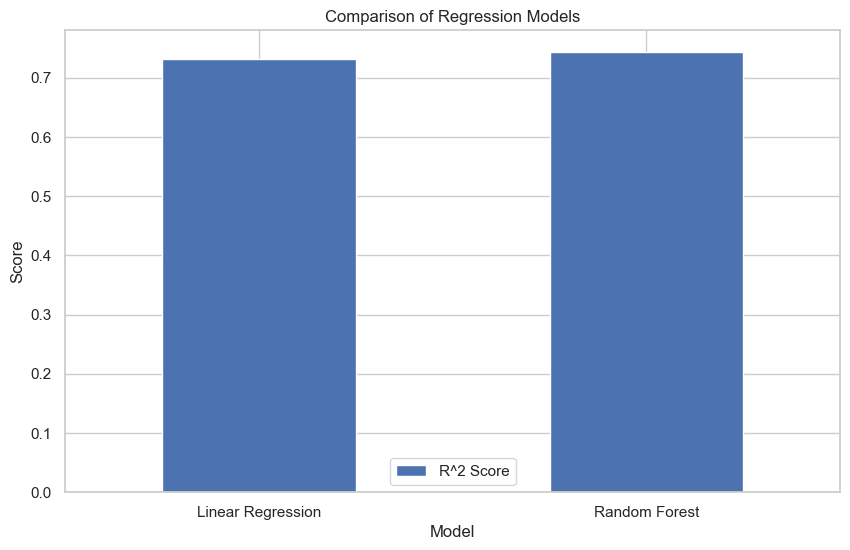

In [177]:
r2_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R^2 Score': [r2_linear, r2_randomForest],
})

# Get Bar graph of R^2
ax1 = r2_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Regression Models')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Print R^2 Scores
for i, score in enumerate(r2_df['R^2 Score']):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')



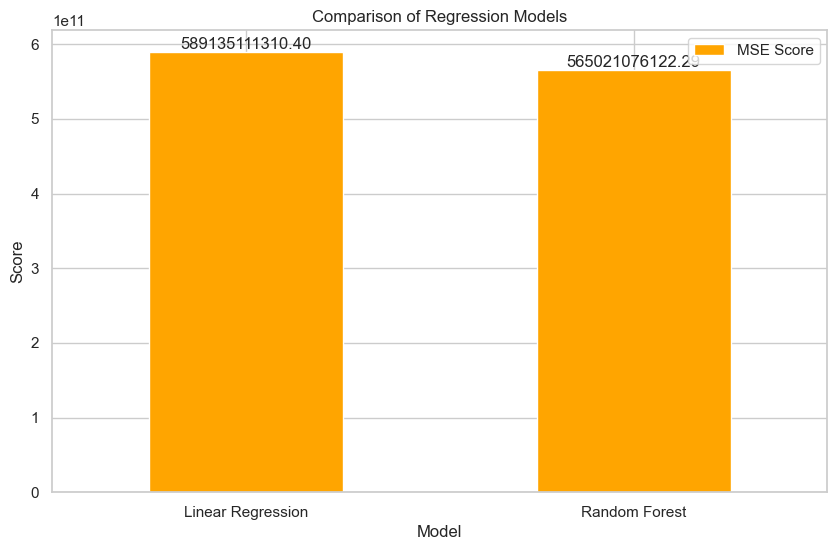

In [178]:
mse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE Score': [mse_linear, mse_randomForest],
})

# Get Bar graph of MSE
ax = mse_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Comparison of Regression Models')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Print MSE Scores
for i, score in enumerate(mse_df['MSE Score']):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')
